In [ ]:
!pip install nilearn
!pip install nibabel

     |████████████████████████████████| 2.4MB 1.4MB/s 


In [ ]:
import nilearn.datasets as ds
import pandas as pd
import os
import nibabel as nb
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [ ]:
ds.fetch_abide_pcp(n_subjects=1)


Dataset created in /root/nilearn_data/ABIDE_pcp



Downloaded 449443 of 449443 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)
/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py:2322: VisibleDeprecationWarning:

Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.



Downloaded 104419884 of 104419884 bytes (100.0%,    0.0s remaining) ...done. (8 seconds, 0 min)


{'description': b'ABIDE\n\n\nNotes\n-----\nThe Autism Brain Imaging Data Exchange (ABIDE) dataset provides previously\ncollected resting state functional magnetic resonance imaging datasets\nfrom 539 individuals with ASD and 573 typical controls for the purpose\nof data sharing in the broader scientific community. This grass-root\ninitiative involved 16 international sites, sharing 20 samples yielding\n1112 datasets composed of both MRI data and an extensive array of\nphenotypic information common across nearly all sites (see below).\n\nNote that this is the preprocessed version of ABIDE provided by the\npreprocess connectome projects (PCP).\n\n\nContent\n-------\n    :\'phenotypic\': Behavioral information.\n\n\nReferences\n----------\n\nFor more information about this dataset\'s structure:\nhttp://preprocessed-connectomes-project.github.io\nhttp://www.childmind.org/en/healthy-brain-network/abide/\n\nNielsen, Jared A., et al. "Multisite functional connectivity MRI\nclassification of a

In [ ]:
files = os.listdir("/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/")
files

['Olin_0050107_func_preproc.nii.gz',
 'Olin_0050128_func_preproc.nii.gz',
 'OHSU_0050169_func_preproc.nii.gz',
 'SDSU_0050184_func_preproc.nii.gz',
 'Pitt_0050015_func_preproc.nii.gz',
 'Pitt_0050054_func_preproc.nii.gz',
 'Pitt_0050023_func_preproc.nii.gz',
 'Pitt_0050027_func_preproc.nii.gz',
 'OHSU_0050160_func_preproc.nii.gz',
 'Olin_0050105_func_preproc.nii.gz',
 'Olin_0050129_func_preproc.nii.gz',
 'Pitt_0050011_func_preproc.nii.gz',
 'Pitt_0050031_func_preproc.nii.gz',
 'Olin_0050102_func_preproc.nii.gz',
 'Pitt_0050026_func_preproc.nii.gz',
 'Pitt_0050053_func_preproc.nii.gz',
 'Pitt_0050056_func_preproc.nii.gz',
 'OHSU_0050170_func_preproc.nii.gz',
 'Olin_0050106_func_preproc.nii.gz',
 'OHSU_0050158_func_preproc.nii.gz',
 'OHSU_0050147_func_preproc.nii.gz',
 'Pitt_0050003_func_preproc.nii.gz',
 'OHSU_0050143_func_preproc.nii.gz',
 'Pitt_0050037_func_preproc.nii.gz',
 'OHSU_0050167_func_preproc.nii.gz',
 'OHSU_0050171_func_preproc.nii.gz',
 'Pitt_0050010_func_preproc.nii.gz',
 

In [ ]:
file_id = [f.split("_")[1][-5:] for f in files if int(f.split("_")[1][-5:]) > 1]
file_id_2 = [f.split("_")[2][-5:] for f in files if f.split("_")[1][-5:] == "1"]

file_id_main = file_id + file_id_2

len(file_id_main)

110

In [ ]:
pre_data = pd.read_csv("https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Phenotypic_V1_0b_preprocessed1.csv")
pre_data

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,FIQ_TEST_TYPE,VIQ_TEST_TYPE,PIQ_TEST_TYPE,ADI_R_SOCIAL_TOTAL_A,ADI_R_VERBAL_TOTAL_BV,ADI_RRB_TOTAL_C,ADI_R_ONSET_TOTAL_D,ADI_R_RSRCH_RELIABLE,ADOS_MODULE,ADOS_TOTAL,ADOS_COMM,ADOS_SOCIAL,ADOS_STEREO_BEHAV,ADOS_RSRCH_RELIABLE,ADOS_GOTHAM_SOCAFFECT,ADOS_GOTHAM_RRB,ADOS_GOTHAM_TOTAL,ADOS_GOTHAM_SEVERITY,SRS_VERSION,SRS_RAW_TOTAL,SRS_AWARENESS,SRS_COGNITION,SRS_COMMUNICATION,SRS_MOTIVATION,...,WISC_IV_SIM_SCALED,WISC_IV_VOCAB_SCALED,WISC_IV_INFO_SCALED,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr,func_efc,func_fber,func_fwhm,func_dvars,func_outlier,func_quality,func_mean_fd,func_num_fd,func_perc_fd,func_gsr,qc_rater_1,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,0,1,50002,1,50002,PITT,no_filename,1,1,16.77,1,Ambi,NaN,103.0,116.0,89.0,WASI,WASI,WASI,16.0,9.0,5.0,4.0,1.0,4.0,12.0,4.0,8.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,10.201539,1.194664,16.223458,3.878000,0.152711,12.072452,0.613128,45.446551,1.873339,1.054931,0.000641,0.011443,0.116828,8.0,3.980100,0.054346,fail,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,fail,ERROR #24,1
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,1,R,NaN,124.0,128.0,115.0,WASI,WASI,WASI,27.0,22.0,5.0,3.0,1.0,4.0,13.0,5.0,8.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7.165701,1.126752,10.460008,4.282238,0.161716,9.241155,0.578301,56.286350,2.012112,0.949857,0.000474,0.031781,0.322092,135.0,67.164179,0.041862,OK,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,1,R,NaN,113.0,108.0,117.0,WASI,WASI,WASI,19.0,12.0,5.0,3.0,1.0,4.0,18.0,6.0,12.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7.698144,1.226218,9.725750,3.881684,0.174186,9.323463,0.578960,63.317943,1.866104,1.180605,0.008262,0.014260,0.127745,29.0,14.427861,0.046745,OK,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,2,R,NaN,119.0,117.0,118.0,WASI,WASI,WASI,23.0,19.0,3.0,4.0,1.0,4.0,12.0,4.0,8.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,9.071807,1.256278,11.198226,3.628667,0.119269,10.814200,0.556064,70.800354,1.918278,1.092030,0.001711,0.019205,0.128136,22.0,10.945274,0.027963,OK,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,1,L,NaN,109.0,99.0,119.0,WASI,WASI,WASI,13.0,10.0,4.0,3.0,1.0,4.0,12.0,4.0,8.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,8.026798,1.407166,6.282055,3.674539,0.130647,10.123574,0.562942,75.364679,2.213873,1.086830,0.001500,0.006919,0.070143,3.0,1.492537,0.054006,OK,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1
5,5,6,50007,6,50007,PITT,Pitt_0050007,1,1,17.78,1,R,NaN,110.0,106.0,112.0,WASI,WASI,WASI,21.0,14.0,9.0,1.0,1.0,3.0,17.0,5.0,12.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,5.775897,1.161231,6.991093,4.104707,0.236214,7.638746,0.607554,64.682109,1.834521,1.099380,0.002805,0.028284,0.151246,38.0,18.905473,0.055615,OK,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lob,OK,NaN,OK,NaN,1
6,6,7,50008,7,50008,PITT,Pitt_0050008,1,1,32.45,1,R,NaN,123.0,123.0,114.0,WASI,WASI,WASI,24.0,20.0,10.0,2.0,1.0,-9999.0,16.0,4.0,12.0,-9999.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,6.669686,1.241491,7.945937,3.831462,0.131733,8.507972

In [ ]:
pre_data_fil = pre_data[pre_data["SUB_ID"].isin(file_id_main)]
pre_data_fil

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,FIQ_TEST_TYPE,VIQ_TEST_TYPE,PIQ_TEST_TYPE,ADI_R_SOCIAL_TOTAL_A,ADI_R_VERBAL_TOTAL_BV,ADI_RRB_TOTAL_C,ADI_R_ONSET_TOTAL_D,ADI_R_RSRCH_RELIABLE,ADOS_MODULE,ADOS_TOTAL,ADOS_COMM,ADOS_SOCIAL,ADOS_STEREO_BEHAV,ADOS_RSRCH_RELIABLE,ADOS_GOTHAM_SOCAFFECT,ADOS_GOTHAM_RRB,ADOS_GOTHAM_TOTAL,ADOS_GOTHAM_SEVERITY,SRS_VERSION,SRS_RAW_TOTAL,SRS_AWARENESS,SRS_COGNITION,SRS_COMMUNICATION,SRS_MOTIVATION,...,WISC_IV_SIM_SCALED,WISC_IV_VOCAB_SCALED,WISC_IV_INFO_SCALED,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr,func_efc,func_fber,func_fwhm,func_dvars,func_outlier,func_quality,func_mean_fd,func_num_fd,func_perc_fd,func_gsr,qc_rater_1,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,1,R,NaN,124.0,128.0,115.0,WASI,WASI,WASI,27.0,22.0,5.0,3.0,1.0,4.0,13.0,5.0,8.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7.165701,1.126752,10.460008,4.282238,0.161716,9.241155,0.578301,56.286350,2.012112,0.949857,0.000474,0.031781,0.322092,135.0,67.164179,0.041862,OK,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,1,R,NaN,113.0,108.0,117.0,WASI,WASI,WASI,19.0,12.0,5.0,3.0,1.0,4.0,18.0,6.0,12.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7.698144,1.226218,9.725750,3.881684,0.174186,9.323463,0.578960,63.317943,1.866104,1.180605,0.008262,0.014260,0.127745,29.0,14.427861,0.046745,OK,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,2,R,NaN,119.0,117.0,118.0,WASI,WASI,WASI,23.0,19.0,3.0,4.0,1.0,4.0,12.0,4.0,8.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,9.071807,1.256278,11.198226,3.628667,0.119269,10.814200,0.556064,70.800354,1.918278,1.092030,0.001711,0.019205,0.128136,22.0,10.945274,0.027963,OK,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,1,L,NaN,109.0,99.0,119.0,WASI,WASI,WASI,13.0,10.0,4.0,3.0,1.0,4.0,12.0,4.0,8.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,8.026798,1.407166,6.282055,3.674539,0.130647,10.123574,0.562942,75.364679,2.213873,1.086830,0.001500,0.006919,0.070143,3.0,1.492537,0.054006,OK,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1
5,5,6,50007,6,50007,PITT,Pitt_0050007,1,1,17.78,1,R,NaN,110.0,106.0,112.0,WASI,WASI,WASI,21.0,14.0,9.0,1.0,1.0,3.0,17.0,5.0,12.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,5.775897,1.161231,6.991093,4.104707,0.236214,7.638746,0.607554,64.682109,1.834521,1.099380,0.002805,0.028284,0.151246,38.0,18.905473,0.055615,OK,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lob,OK,NaN,OK,NaN,1
6,6,7,50008,7,50008,PITT,Pitt_0050008,1,1,32.45,1,R,NaN,123.0,123.0,114.0,WASI,WASI,WASI,24.0,20.0,10.0,2.0,1.0,-9999.0,16.0,4.0,12.0,-9999.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,6.669686,1.241491,7.945937,3.831462,0.131733,8.507972,0.571447,60.682083,1.909622,1.038369,0.000524,0.018028,0.169275,58.0,28.855721,0.056363,OK,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
8,8,9,50010,9,50010,PITT,Pitt_0050010,1,1,35.20,1,L,NaN,81.0,81.0,93.0,WASI,WASI,WASI,-9999.0,-9999.0,-9999.0,-9999.0,1.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,11.450388,0.931668,29.233811,3.852356,0.073776,13.29214

In [ ]:
y = pre_data_fil["DX_GROUP"]

y

1      1
2      1
3      1
4      1
5      1
6      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
26     2
27     2
28     2
29     2
30     2
31     2
32     2
33     2
34     2
      ..
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
105    1
106    2
107    2
108    2
109    2
110    2
111    2
112    2
113    2
116    2
117    2
118    2
119    2
120    2
121    1
122    1
123    1
125    1
126    1
127    1
128    1
Name: DX_GROUP, Length: 110, dtype: int64

In [ ]:
file_list = os.listdir("/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/")

X = np.zeros((110, 61, 73, 61))

In [ ]:
for i, file in zip(range(210), file_list):
    nii_img = nb.load(os.path.join("/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/", file))
    
    data = nii_img.get_fdata()
    
    X[i] = data[:, :, :, 0]
    

In [ ]:
X_rs = X.reshape(110, -1)
scaler = StandardScaler()
binarizer = LabelBinarizer()
X_scaled = scaler.fit_transform(X_rs)
X_scaled = X_scaled.reshape(110, 61, 73, 61)
y_binned = binarizer.fit_transform(y.values.reshape(-1, 1))
X_train = X_scaled[:50, :, :, :]
y_train = y_binned[:50]
X_val = X_scaled[50:80, :, :, :]
y_val = y_binned[50:80]
X_test = X_scaled[80:, :, :, :]
y_test = y_binned[80:]

In [ ]:
model_conv2d = Sequential()
model_conv2d.add(Conv2D(32, batch_size=10, padding="same", kernel_size=(2,2), 
                        data_format="channels_first",
                        activation="relu", input_shape=(61, 73, 61)))
model_conv2d.add(MaxPooling2D((1, 1)))
model_conv2d.add(Conv2D(64, padding="same", kernel_size=(2,2), 
                        activation="relu"))
model_conv2d.add(MaxPooling2D((1, 1)))
model_conv2d.add(Conv2D(128, padding="same", kernel_size=(2,2),
                        activation="relu"))
model_conv2d.add(MaxPooling2D((1, 1)))
model_conv2d.add(Conv2D(256, padding="same", kernel_size=(2,2),
                        activation="relu"))
model_conv2d.add(MaxPooling2D((1, 1)))
model_conv2d.add(Conv2D(512, padding="same", kernel_size=(2,2), 
                        activation="relu"))
model_conv2d.add(MaxPooling2D((1, 1)))
model_conv2d.add(Flatten())
model_conv2d.add(Dense(512, activation="tanh"))
model_conv2d.add(Dense(1, activation="sigmoid"))

model_conv2d.summary()








Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (10, 32, 73, 61)          7840      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (10, 32, 73, 61)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (10, 32, 73, 64)          15680     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (10, 32, 73, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (10, 32, 73, 128)         32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (10, 32, 73, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (10, 32, 73, 256)  

In [ ]:
model_conv2d.compile(loss="binary_crossentropy", optimizer=RMSprop(lr=1e-8), metrics=["acc"])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
model_conv2d.fit(X_train, y_train,
                epochs=30,
                batch_size=10,
                validation_data=(X_val, y_val))

Train on 50 samples, validate on 30 samples
Epoch 1/30


In [ ]:
y_pred = model_conv2d.predict(X_test, batch_size=10)

In [ ]:
model_conv2d.evaluate(X_test, y_test, batch_size=10)

30/30 [==============================] - 0s 12ms/step


[1.7652058204015095, 0.5333333313465118]

In [ ]:
X_test.shape

(30, 61, 73, 61)

In [ ]:
!rm -r /root/nilearn_data/

In [ ]:
a = [1, 2, 3]
b = [4, 5, 6]

print(list(zip(a, b)))

[(1, 4), (2, 5), (3, 6)]


In [ ]:
img = nb.load("/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050003_func_preproc.nii.gz")

In [ ]:
data = img.get_data()
data.shape

(61, 73, 61, 196)

In [ ]:
data = data[:, 0:61, :, 0]

ValueError: ignored

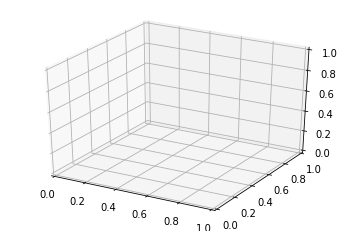

In [ ]:
x = data[:, 0, 0]
y = data[0, :, 0]
z = data[0, 0, :]

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()